C:\Users\hte12\AppData\Local\Temp\ipykernel_18284\1890964789.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

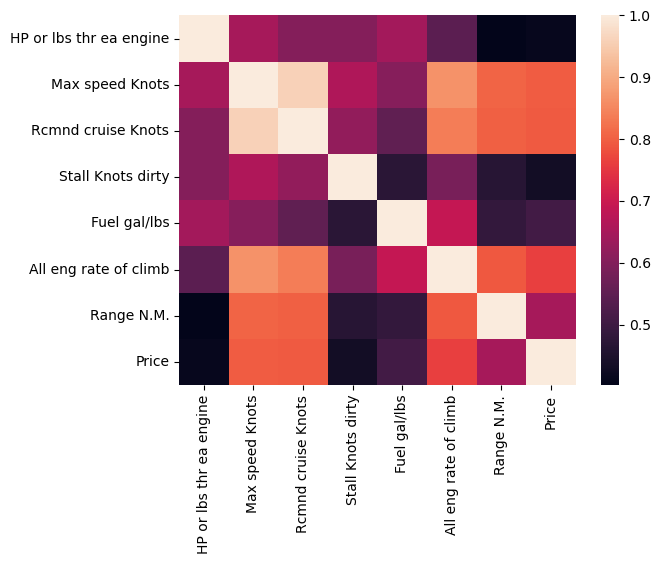

In [399]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("PlanePrice.csv")
df.head(30)

# invalid string types
df["Range N.M."] = pd.to_numeric(df["Range N.M."], errors='coerce')
df["HP or lbs thr ea engine"] = pd.to_numeric(df["HP or lbs thr ea engine"], errors='coerce')
df["Max speed Knots"] = pd.to_numeric(df["Max speed Knots"], errors='coerce')
df["All eng rate of climb"] = pd.to_numeric(df["All eng rate of climb"], errors='coerce')

df = df.drop(["Eng out rate of climb"], axis=1)
df = df.drop(["Empty weight lbs"], axis=1)
df = df.drop(["Takeoff over 50ft"], axis=1)
df = df.drop(["Landing over 50ft"], axis=1)
df = df.drop(["Model Name"], axis=1)
df = df.drop(["Wing span ft/in"], axis=1)
df = df.drop(["Length ft/in"], axis=1)
df = df[df["Engine Type"] != "piston"]
df = df.dropna()
sns.heatmap(df.corr())




array([[<Axes: title={'center': 'HP or lbs thr ea engine'}>,
        <Axes: title={'center': 'Max speed Knots'}>,
        <Axes: title={'center': 'Rcmnd cruise Knots'}>],
       [<Axes: title={'center': 'Stall Knots dirty'}>,
        <Axes: title={'center': 'Fuel gal/lbs'}>,
        <Axes: title={'center': 'All eng rate of climb'}>],
       [<Axes: title={'center': 'Range N.M.'}>,
        <Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

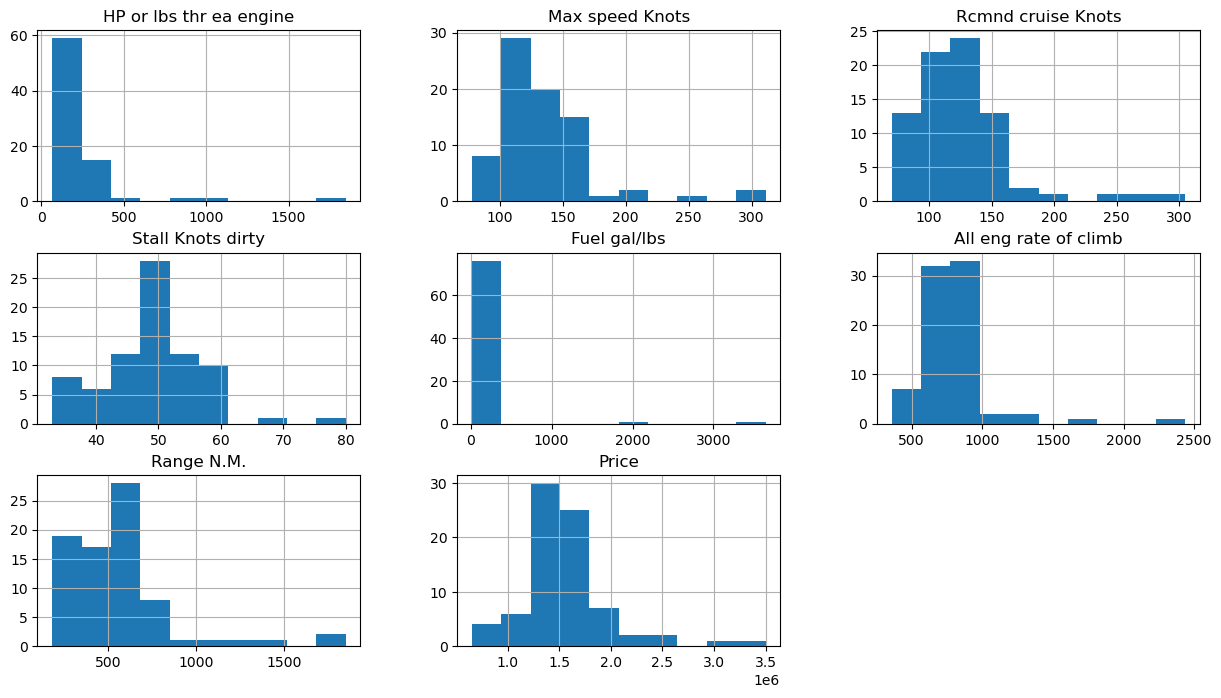

In [400]:
from sklearn.model_selection import train_test_split

X = df.drop(["Price"], axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.5)

train_data = X_train.join(y_train)
train_data.hist(figsize = (15,8))


Engine Type                 3
HP or lbs thr ea engine    25
Max speed Knots            50
Rcmnd cruise Knots         53
Stall Knots dirty          27
Fuel gal/lbs               34
All eng rate of climb      54
Range N.M.                 64
Price                      55
dtype: int64

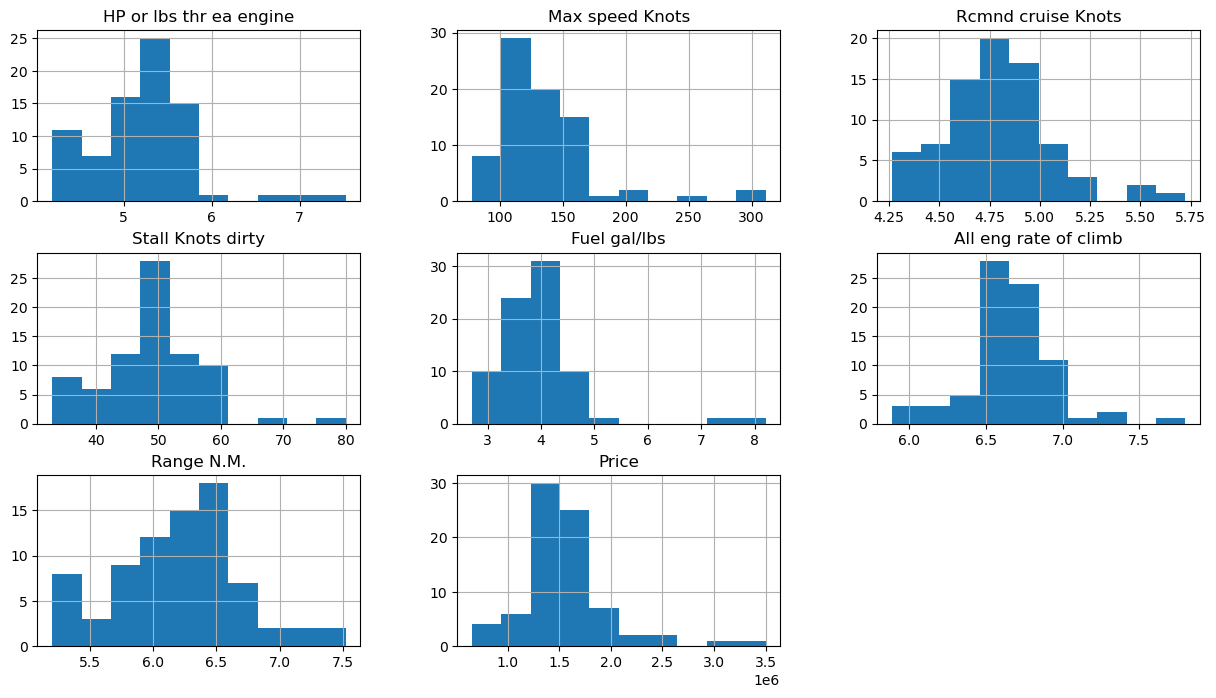

In [401]:
# making normal distributions using log
import numpy as np
train_data["Rcmnd cruise Knots"] = np.log(train_data["Rcmnd cruise Knots"]+1)
train_data["Fuel gal/lbs"] = np.log(train_data["Fuel gal/lbs"]+1)
train_data["HP or lbs thr ea engine"] = np.log(train_data["HP or lbs thr ea engine"]+1)
train_data["All eng rate of climb"] = np.log(train_data["All eng rate of climb"]+1)
train_data["Range N.M."] = np.log(train_data["Range N.M."]+1)
train_data.hist(figsize=(15,8))
train_data.nunique()



In [402]:
# one hot encoding
train_data = train_data.join(pd.get_dummies(train_data["Engine Type"])).drop(["Engine Type"], axis = 1)
# train_data = train_data.join(pd.get_dummies(train_data["Wing span ft/in"])).drop(["Wing span ft/in"], axis = 1)
# train_data = train_data.join(pd.get_dummies(train_data["Length ft/in"])).drop(["Length ft/in"], axis = 1)

train_data

,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Range N.M.,Price,Jet,Piston,Propjet
451,4.454347,91.0,4.430817,37.0,3.433987,6.463029,5.849325,1550000.0,0,1,0
420,4.615121,145.0,4.787492,35.0,3.401197,6.746412,6.594413,1320000.0,0,1,0
361,7.521318,311.0,5.723585,67.0,7.601402,7.383989,7.151485,3100000.0,1,0,0
324,5.198497,130.0,4.795791,49.0,3.912023,6.634633,6.018593,1580000.0,0,1,0
20,5.398163,114.0,4.262680,48.0,3.526361,6.077642,5.252273,700000.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
301,5.463832,168.0,5.062595,49.0,4.532599,6.873164,6.612041,2000000.0,0,1,0
286,5.707110,107.0,4.644391,55.0,4.007333,6.265301,5.673323,870000.0,0,1,0
345,4.983607,122.0,4.744932,51.0,3.761200,6.594413,6.246107,1510000.0,0,1,0
2,4.510860,90.0,4.369448,37.0,2.995732,6.478510,5.351858,1600000.0,0,1,0


In [403]:
# basic Regression
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(["Price"], axis=1), train_data["Price"]
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [404]:
test_data = X_test.join(y_test)

test_data["Rcmnd cruise Knots"] = np.log(test_data["Rcmnd cruise Knots"]+1)
test_data["Fuel gal/lbs"] = np.log(test_data["Fuel gal/lbs"]+1)
test_data["HP or lbs thr ea engine"] = np.log(test_data["HP or lbs thr ea engine"]+1)
test_data["All eng rate of climb"] = np.log(test_data["All eng rate of climb"]+1)
test_data["Range N.M."] = np.log(test_data["Range N.M."]+1)
test_data = test_data.join(pd.get_dummies(test_data["Engine Type"])).drop(["Engine Type"], axis = 1)
# test_data = test_data.join(pd.get_dummies(test_data["Length ft/in"])).drop(["Length ft/in"], axis = 1)

In [405]:
X_test, y_test = test_data.drop(["Price"], axis=1), test_data["Price"]
X_test.nunique()
reg.score(X_test, y_test)

0.5888405867840635

In [406]:
# random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
forest = RandomForestRegressor()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

forest.fit(X_train_s, y_train)
forest.score(X_test_s, y_test)




0.6769360640890341

In [407]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
param_grid = {
    "n_estimators": [100,200,300],
    "min_samples_split": [2,4, 8],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train_s, y_train)
best_forest = grid_search.best_params_

best_model = RandomForestRegressor(**best_forest)
best_model.fit(X_train_s, y_train)
best_model.score(X_test_s, y_test)

0.6687407127709074